## Gray-scale Morphology
Raghuttam Hombal<br>2K20E22

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [2]:
#Decorator to calculate the time to finish the function
def calculate_time(func):
    def inner_function(*args, **kwargs):
        begin = time.time()
        img_ = func(*args,**kwargs)
        end = time.time()
        print("Total Time taken = ",end-begin)
        return img_
    return inner_function

### Basic Morphology operations
Dilation is done by selecting pixels in accordance with structuring element and the maximum of the collection is assigned to the selected position.<br>Just like dilation, Erosion is done by selecting pixels in accordance with structuring element and the minimum of the collection is assigned to the selected position.

In [3]:
def morphological_operate(img,ker,choice='dilate'):
    img_ = np.zeros(img.shape)
    kx,ky = ker.shape
    kx,ky = int(kx/2),int(ky/2)
    for i in range(kx,img.shape[0]-kx):
        for j in range(ky,img.shape[1]-ky):
            
            #If the Kernel has only ONES, then the processing is made faster
            if np.amax(ker)==np.amin(ker):
                select = img[i-kx:i+kx+1,j-ky:j+ky+1]
            #If the sructuring element is of some shape then, 
            #only those pixels are selected that are corresponding to ONE
            else:
                select = []
                for k in range(-kx,kx+1):
                    for l in range(-ky,ky+1):
                        if ker[k][l]==1:
                            select.append(img[i+k][j+l])
                        
            if choice=='erode':
                img_[i][j] = np.amin(select)
            elif choice=='dilate':
                img_[i][j] = np.amax(select)
    return img_.astype(int)

The subtraction function is done below, when the value of A-B goes beyond extrema, the function takes care by limiting the extreme, else, the value goes beyond, making the pixels to be inverted

In [4]:
def subtract_mat(A,B):
    img_ = np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            x = int(A[i][j]-B[i][j])
            if x<=255 and x>=0:
                img_[i][j] = x
            elif x>255:
                img_[i][j]=255
            else:
                img_[i][j]=0
    return img_.astype(int)

### Opening
It is done by eroding the image and dilating that image, with same structuring element
$$ A \circ B = (A \ominus B) \oplus B $$

In [5]:
@calculate_time
def opening(img,ker):
    img = morphological_operate(img.copy(),ker,'erode')
    plt.subplot(1,2,1)
    plt.imshow(img,cmap='gray')
    plt.title("When Eroded")
    img = morphological_operate(img.copy(),ker,'dilate')
    plt.subplot(1,2,2)
    plt.imshow(img,cmap='gray')
    plt.title("When Dilated")
    plt.show()
    return img

### Closing
This operation is done by first Dilating the image and then eroding it by same structuring element
$$ A \bullet B = (A \oplus B) \ominus B $$

In [6]:
@calculate_time
def closing(img,ker):
    img = morphological_operate(img.copy(),ker,'dilate')
    plt.subplot(1,2,1)
    plt.imshow(img,cmap='gray')
    plt.title("When Eroded")
    img = morphological_operate(img.copy(),ker,'erode')
    plt.subplot(1,2,2)
    plt.imshow(img,cmap='gray')
    plt.title("When Dilated")
    plt.show()
    return img

### Top-hat and Bottom-hat Transformations
This is done by subtrating opened image from original image, i.e. $ A - ( A \circ B) $<br> This is usually used to detect Light objects on dark background<br><br>
This is done by subtrating original image from closed image, i.e. $( A \bullet B) - A $<br> This is usually used to detect Dark objects on light background

In [7]:
def tophat(img,ker):
    img_open = opening(img.copy(),ker)
    img_tophat = subtract_mat(img,img_open)
    return img_tophat

def bottomhat(img,ker):
    img_close = closing(img.copy(),ker)
    img_bottomhat = subtract_mat(img_close,img)
    return img_bottomhat

Solving the assigned sample image using a circle structuring element of radius $r = 5$

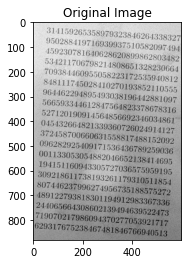

In [9]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
img = cv2.imread('test.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.show()

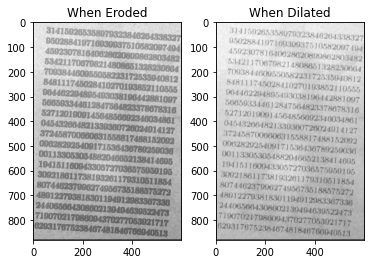

Total Time taken =  64.2221839427948


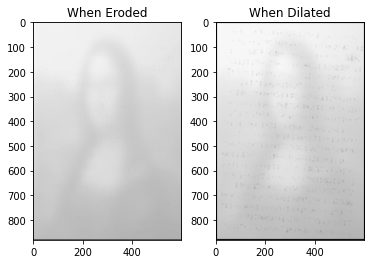

Total Time taken =  65.21264481544495


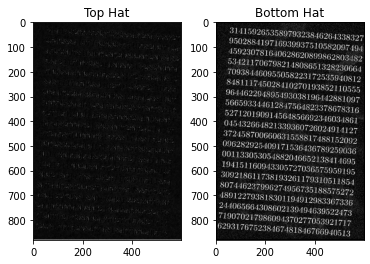

In [10]:
img_top = tophat(img.copy(),SE)
img_bottom = bottomhat(img.copy(),SE)
plt.subplot(1,2,1)
plt.imshow(img_top,cmap='gray')
plt.title("Top Hat")
plt.subplot(1,2,2)
plt.imshow(img_bottom,cmap='gray')
plt.title("Bottom Hat")
plt.show()

Using Circular structuring element of radius $r = 21$

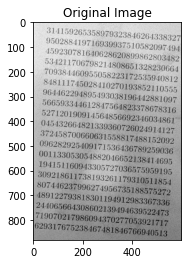

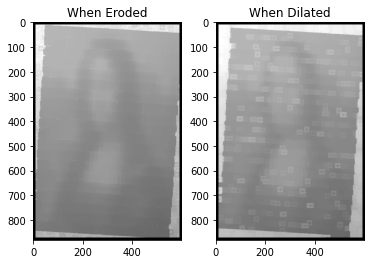

Total Time taken =  823.5276210308075


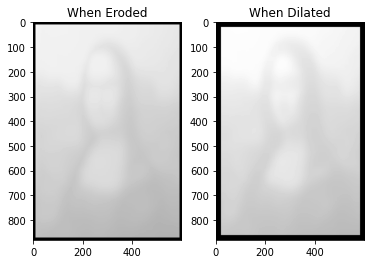

Total Time taken =  801.4424629211426


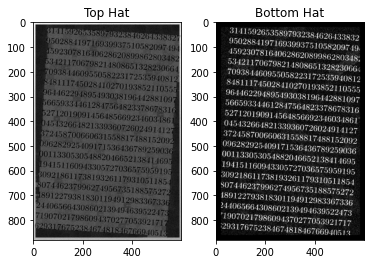

In [13]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21))
img = cv2.imread('test.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.show()


img_top = tophat(img.copy(),SE)
img_bottom = bottomhat(img.copy(),SE)
plt.subplot(1,2,1)
plt.imshow(img_top,cmap='gray')
plt.title("Top Hat")
plt.subplot(1,2,2)
plt.imshow(img_bottom,cmap='gray')
plt.title("Bottom Hat")
plt.show()

Structing element being a Square of side $s = 3$

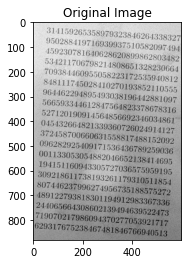

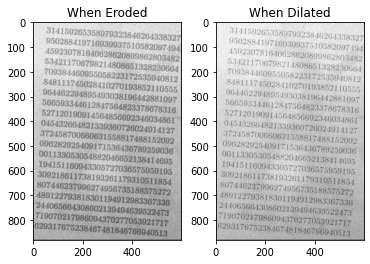

Total Time taken =  13.675415754318237


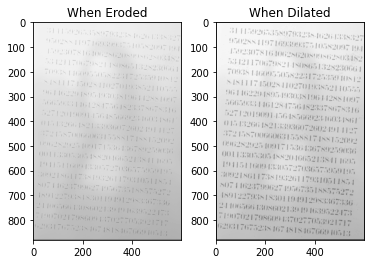

Total Time taken =  12.904622316360474


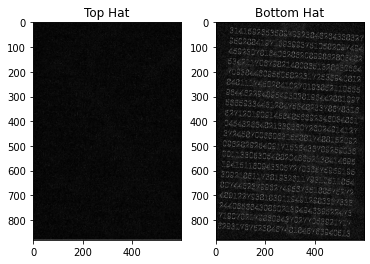

In [11]:
SE = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
img = cv2.imread('test.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.show()


img_top = tophat(img.copy(),SE)
img_bottom = bottomhat(img.copy(),SE)
plt.subplot(1,2,1)
plt.imshow(img_top,cmap='gray')
plt.title("Top Hat")
plt.subplot(1,2,2)
plt.imshow(img_bottom,cmap='gray')
plt.title("Bottom Hat")
plt.show()

Structuring element used is a square of sie $s = 21$

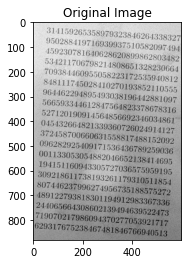

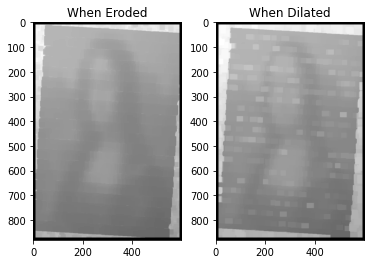

Total Time taken =  14.615848302841187


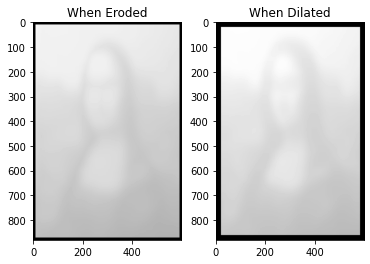

Total Time taken =  15.118269681930542


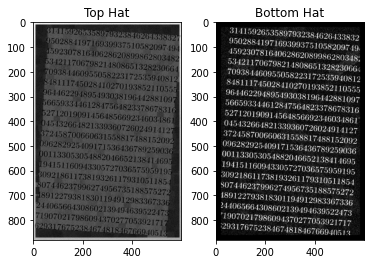

In [12]:
SE = cv2.getStructuringElement(cv2.MORPH_RECT,(21,21))
img = cv2.imread('test.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.show()


img_top = tophat(img.copy(),SE)
img_bottom = bottomhat(img.copy(),SE)
plt.subplot(1,2,1)
plt.imshow(img_top,cmap='gray')
plt.title("Top Hat")
plt.subplot(1,2,2)
plt.imshow(img_bottom,cmap='gray')
plt.title("Bottom Hat")
plt.show()

In conclusion we can notice that,
- Bottom-hat transformation proves to be better as expected as it is used to detect dark objects on bright background.
- Increasing the size of structuring element do have a significant change on the output, as the output becomes more distinguishable than background.
- Shape of the strucuring element also makes a huge difference in the output, as we can see that, circular structuring elements give better result than the equivalent squre structuring elements.